This is recreation of the original 2016 analysis with additional breakout of per capita statistics.

In [1]:
import os
import pandas

First see what's in the motherjones dataset.

In [2]:
mj_data = pandas.read_csv('./data/Motherjones Mass Shooting Database 1982-2024.csv')
mj_data.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Apalachee High School shooting,"Winder, Georgia",9/4/24,"Colt Gray, 14, was apprehended by responding p...",4,9,13,School,14,yes,...,AR-15,White,M,https://www.nbcnews.com/news/us-news/suspect-c...,https://www.washingtonpost.com/nation/2024/09/...,-,-,-,mass,2024
1,Arkansas grocery store shooting,"Fordyce, Arkansas",6/21/24,"Travis Posey, 44, opened fire in the parking l...",4,10,14,workplace,44,-,...,12-gauge shotgun,White,M,https://apnews.com/article/shooting-fordyce-ma...,-,-,-,-,mass,2024
2,UNLV shooting,"Las Vegas, Nevada",12/6/23,"Anthony Polito, 67, a former university profes...",3,1,4,School,67,-,...,-,White,M,https://www.nbcnews.com/news/us-news/anthony-p...,-,-,-,-,mass,2023
3,Maine bowling alley and bar shootings,"Lewiston, Maine",10/25/23,"Robert Card, 40, an Army reservist and firearm...",18,13,31,Other,40,yes,...,AR-15-style rifle (Rugar SFAR),White,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,-,-,Spree,2023
4,Jacksonville Dollar General store shooting,"Jacksonville, Florida",8/26/23,"Ryan Palmeter, 21, outfitted in body armor, fa...",3,0,3,workplace,21,yes,...,AR-15-style rifle; Glock pistol,White,M,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,-,-,-,mass,2023


Now reduce location data to the state level.

In [3]:
mj_data.location = mj_data.location.apply(lambda x: x.split(',').pop().strip())
mj_data.rename(columns={'location':'state'}, inplace=True)
mj_data.head()

,case,state,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Apalachee High School shooting,Georgia,9/4/24,"Colt Gray, 14, was apprehended by responding p...",4,9,13,School,14,yes,...,AR-15,White,M,https://www.nbcnews.com/news/us-news/suspect-c...,https://www.washingtonpost.com/nation/2024/09/...,-,-,-,mass,2024
1,Arkansas grocery store shooting,Arkansas,6/21/24,"Travis Posey, 44, opened fire in the parking l...",4,10,14,workplace,44,-,...,12-gauge shotgun,White,M,https://apnews.com/article/shooting-fordyce-ma...,-,-,-,-,mass,2024
2,UNLV shooting,Nevada,12/6/23,"Anthony Polito, 67, a former university profes...",3,1,4,School,67,-,...,-,White,M,https://www.nbcnews.com/news/us-news/anthony-p...,-,-,-,-,mass,2023
3,Maine bowling alley and bar shootings,Maine,10/25/23,"Robert Card, 40, an Army reservist and firearm...",18,13,31,Other,40,yes,...,AR-15-style rifle (Rugar SFAR),White,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,-,-,Spree,2023
4,Jacksonville Dollar General store shooting,Florida,8/26/23,"Ryan Palmeter, 21, outfitted in body armor, fa...",3,0,3,workplace,21,yes,...,AR-15-style rifle; Glock pistol,White,M,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,-,-,-,mass,2023


In [4]:
mj_data

,case,state,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Apalachee High School shooting,Georgia,9/4/24,"Colt Gray, 14, was apprehended by responding p...",4,9,13,School,14,yes,...,AR-15,White,M,https://www.nbcnews.com/news/us-news/suspect-c...,https://www.washingtonpost.com/nation/2024/09/...,-,-,-,mass,2024
1,Arkansas grocery store shooting,Arkansas,6/21/24,"Travis Posey, 44, opened fire in the parking l...",4,10,14,workplace,44,-,...,12-gauge shotgun,White,M,https://apnews.com/article/shooting-fordyce-ma...,-,-,-,-,mass,2024
2,UNLV shooting,Nevada,12/6/23,"Anthony Polito, 67, a former university profes...",3,1,4,School,67,-,...,-,White,M,https://www.nbcnews.com/news/us-news/anthony-p...,-,-,-,-,mass,2023
3,Maine bowling alley and bar shootings,Maine,10/25/23,"Robert Card, 40, an Army reservist and firearm...",18,13,31,Other,40,yes,...,AR-15-style rifle (Rugar SFAR),White,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,-,-,Spree,2023
4,Jacksonville Dollar General store shooting,Florida,8/26/23,"Ryan Palmeter, 21, outfitted in body armor, fa...",3,0,3,workplace,21,yes,...,AR-15-style rifle; Glock pistol,White,M,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,-,-,-,mass,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Shopping centers spree killings,Florida,4/23/1987,"Retired librarian William Cruse, 59, was paran...",6,14,20,Other,59,Yes,...,"Sturm, Ruger Mini-14 semiautomatic rifle; 20-g...",white,Male,http://articles.latimes.com/1987-04-25/news/mn...,(Supreme Court of Florida Document) http://www...,http://articles.latimes.com/1987-04-25/news/mn...,28.0331886,-80.6429695,Spree,1987
147,United States Postal Service shooting,Oklahoma,8/20/1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,44,Unclear,...,".22-caliber, two .45-caliber Colt Model 1911-A...",white,Male,http://news.google.com/newspapers?id=dm8aAAAAI...,http://newsok.com/sherrill-feared-mental-illne...,http://news.google.com/newspapers?id=dm8aAAAAI...,35.6672015,-97.42937037,Mass,1986
148,San Ysidro McDonald's massacre,California,7/18/1984,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,...,9mm Browning P35 Hi-Power semiautomatic handgu...,white,Male,http://www.utsandiego.com/san-ysidro-massacre/...,http://www.nctimes.com/news/local/article_2ba4...,http://www.utsandiego.com/san-ysidro-massacre/...,32.5520013,-117.0430813,Mass,1984
149,Dallas nightclub shooting,Texas,6/29/1984,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,...,9mm Smith & Wesson 459 semiautomatic handgun,white,Male,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,32.925166,-96.838676,Mass,1984


Confirm all dates are unique, then use that as the index.

In [5]:
len(mj_data.date.unique())

151

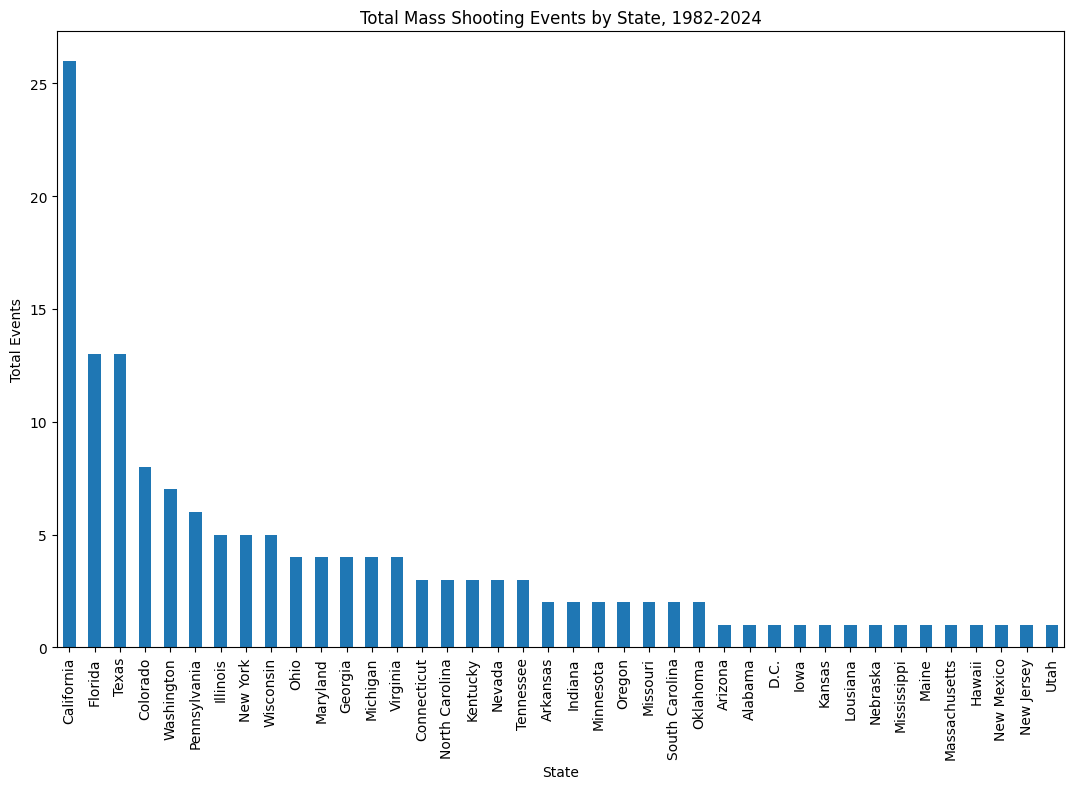

In [6]:
mj_events_per_state = mj_data.groupby('state')['case'].count().sort_values(ascending=False)
mj_events_per_state.plot(kind='bar',title='Total Mass Shooting Events by State, 1982-2024',ylabel='Total Events',xlabel='State',figsize=(13,8))
pass # hide df.plot() output

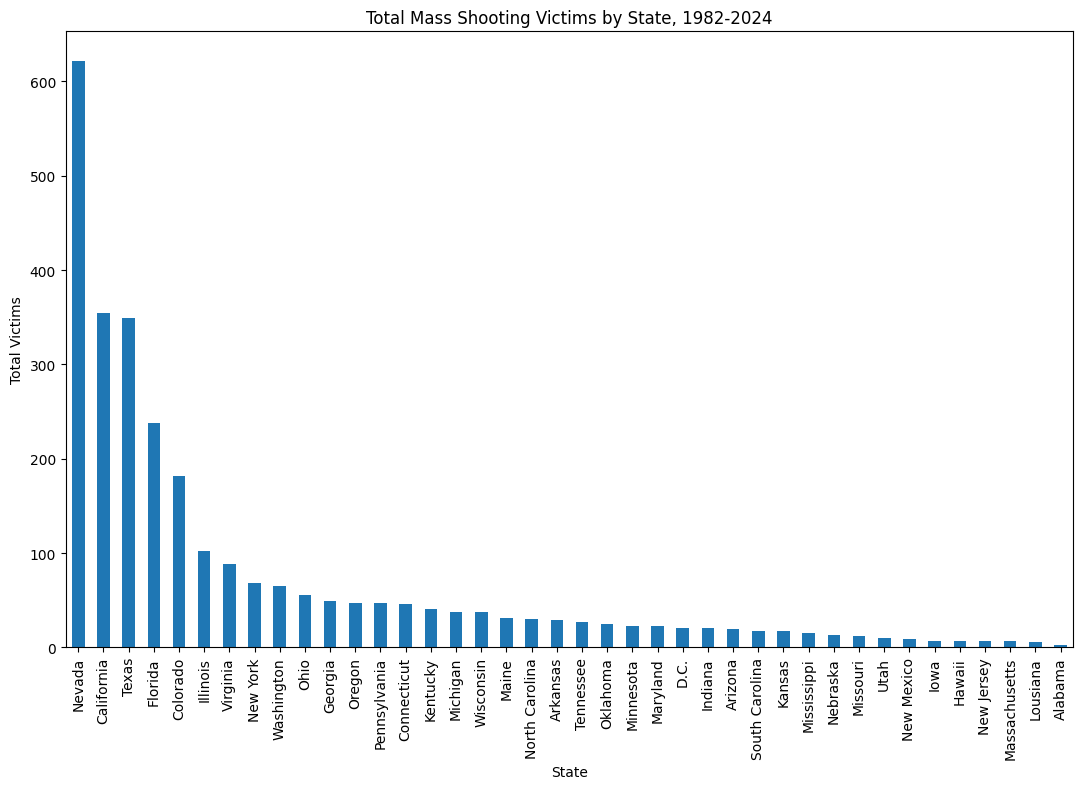

In [7]:
mj_victims_per_state = mj_data.groupby('state')['total_victims'].sum().sort_values(ascending=False)
mj_victims_per_state.plot(kind='bar',title='Total Mass Shooting Victims by State, 1982-2024',ylabel='Total Victims',xlabel='State',figsize=(13,8))
pass

As before, it doesn't say much.

Now to look at population for each state to determine per capita. The strategy is to pull in the census data for 1910-2020, then map that to the events table to determine state population at the time of the shooting event.

In [8]:
pop_by_year = pandas.read_csv('./data/Census-Population-Change-Data-1910-2020.csv')
pop_by_year = pop_by_year[pop_by_year['Geography Type'] == 'State'][['Name', 'Year', 'Resident Population']]
pop_by_year.rename(columns={'Name':'state', 'Year':'year', 'Resident Population':'population'}, inplace=True)
pop_by_year.population = pop_by_year.population.apply(lambda x : int(x.replace(',','')))
pop_by_year

,state,year,population
0,Alabama,1910,2138093
1,Alaska,1910,64356
2,Arizona,1910,204354
3,Arkansas,1910,1574449
4,California,1910,2377549
...,...,...,...
674,Virginia,2020,8631393
675,Washington,2020,7705281
676,West Virginia,2020,1793716
677,Wisconsin,2020,5893718


In [9]:
def date_to_year(date:str) -> int:
    year = date.split('/').pop()
    if len(year) < 4: year = '20' + year
    return int(year)

mj_data.year = mj_data.date.apply(date_to_year)
mj_data[['case', 'state', 'year']]

,case,state,year
0,Apalachee High School shooting,Georgia,2024
1,Arkansas grocery store shooting,Arkansas,2024
2,UNLV shooting,Nevada,2023
3,Maine bowling alley and bar shootings,Maine,2023
4,Jacksonville Dollar General store shooting,Florida,2023
...,...,...,...
146,Shopping centers spree killings,Florida,1987
147,United States Postal Service shooting,Oklahoma,1986
148,San Ysidro McDonald's massacre,California,1984
149,Dallas nightclub shooting,Texas,1984


In [10]:
mj_data['state_population'] = pandas.Series(dtype='int64')
for i, row in mj_data.iterrows():
    try: pop = pop_by_year[(pop_by_year.state == row.state) & (pop_by_year.year == (row.year // 10) * 10)].population.values[0]
    except: continue
    mj_data.at[i, 'state_population'] = pop

mj_data.head()

,case,state,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,state_population
0,Apalachee High School shooting,Georgia,9/4/24,"Colt Gray, 14, was apprehended by responding p...",4,9,13,School,14,yes,...,White,M,https://www.nbcnews.com/news/us-news/suspect-c...,https://www.washingtonpost.com/nation/2024/09/...,-,-,-,mass,2024,10711908.0
1,Arkansas grocery store shooting,Arkansas,6/21/24,"Travis Posey, 44, opened fire in the parking l...",4,10,14,workplace,44,-,...,White,M,https://apnews.com/article/shooting-fordyce-ma...,-,-,-,-,mass,2024,3011524.0
2,UNLV shooting,Nevada,12/6/23,"Anthony Polito, 67, a former university profes...",3,1,4,School,67,-,...,White,M,https://www.nbcnews.com/news/us-news/anthony-p...,-,-,-,-,mass,2023,3104614.0
3,Maine bowling alley and bar shootings,Maine,10/25/23,"Robert Card, 40, an Army reservist and firearm...",18,13,31,Other,40,yes,...,White,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,-,-,Spree,2023,1362359.0
4,Jacksonville Dollar General store shooting,Florida,8/26/23,"Ryan Palmeter, 21, outfitted in body armor, fa...",3,0,3,workplace,21,yes,...,White,M,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,-,-,-,mass,2023,21538187.0


In [16]:
mj_data['victims_per_capita'] = mj_data.total_victims / mj_data.state_population
mj_data.victims_per_capita

0      1.213603e-06
1      4.648809e-06
2      1.288405e-06
3      2.275465e-05
4      1.392875e-07
           ...     
146    2.052056e-06
147    6.941483e-06
148    1.732304e-06
149    4.919465e-07
150    1.128631e-06
Name: victims_per_capita, Length: 151, dtype: float64

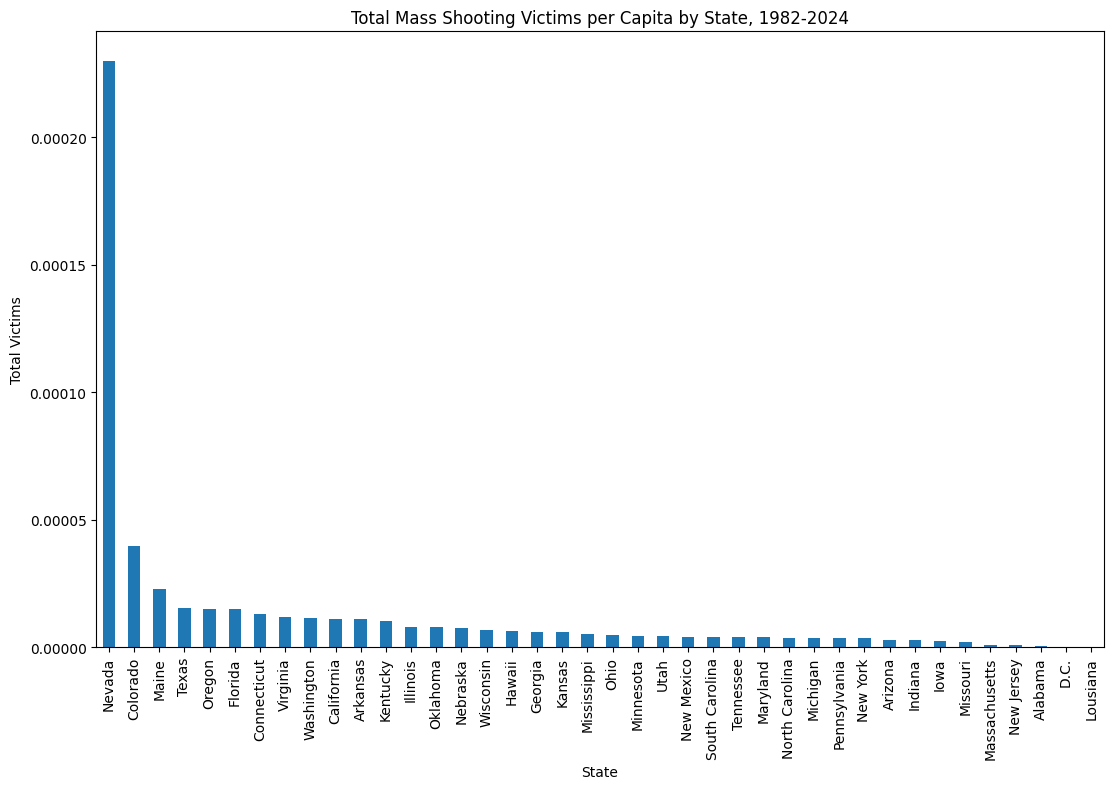

In [17]:
mj_victims_per_state = mj_data.groupby('state').victims_per_capita.sum().sort_values(ascending=False)
mj_victims_per_state.plot(kind='bar',title='Total Mass Shooting Victims per Capita by State, 1982-2024',ylabel='Total Victims',xlabel='State',figsize=(13,8))
pass